In [33]:
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import diff_classifier.aws as aws
import numpy as np

In [2]:
rfolder = 'registration/03_26_18_registration_method_dev'
fname = 'S1_pre_DAPI'
ext = 'nd2'
rimage = '{}/{}.{}'.format(rfolder, fname, ext)
limage = '{}.{}'.format(fname, ext)

In [ ]:
aws.download_s3(rimage, limage)

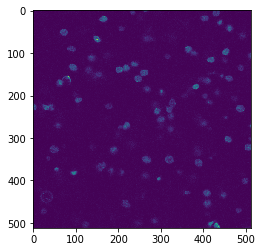

In [3]:
with ND2Reader(limage) as images:
    plt.imshow(images[3])

In [28]:
with ND2Reader(limage) as images:
    print(images.metadata)

{'height': 512, 'width': 512, 'date': datetime.datetime(2018, 3, 26, 12, 44, 34), 'fields_of_view': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,

In [27]:
with ND2Reader(limage) as images:
    images.iter_axes = 'v'
    counter = 0
    for fov in images:
        counter = counter + 1
        if counter==7:
            #plt.imshow(fov)
            print(fov.shape)

(512, 512)


In [31]:
images.sizes

{'t': 1, 'v': 720, 'x': 512, 'y': 512}

In [109]:
with ND2Reader(limage) as images:
    
    if 't' in images.sizes.keys():
        t = images.sizes['t']
        images.iter_axes = 't'
    else:
        t = 1
    if 'v' in images.sizes.keys():
        v = images.sizes['v']
        images.iter_axes = 'v'
    else:
        v = 1
    if 'c' in images.sizes.keys():
        c = images.sizes['c']
        images.iter_axes = 'c'
    else:
        c = 1
    if 'z' in images.sizes.keys():
        z = images.sizes['z']
        images.iter_axes = 'z'
    else:
        z = 1

    x = images.sizes['x']
    y = images.sizes['y']

    new_image = np.zeros((t, v, c, z, x, y))

    images.iter_axes = 'v'
    counter = 0
    for fov in images:
        new_image[0, counter, 0, 0, :, :] = fov.astype(np.uint8)
        counter = counter + 1
    


In [111]:
new_image[0, 4, :, :]

array([[ 54.,  50.,  42., ...,  40.,  40.,  40.],
       [ 73.,  42.,  51., ...,  87.,  87.,  50.],
       [ 63.,  47.,  49., ...,  52.,  58.,  44.],
       ..., 
       [ 44.,  40.,  44., ...,  61.,  46.,  37.],
       [ 55.,  59.,  66., ...,  45.,  42.,  50.],
       [ 37.,  43.,  41., ...,  71.,  46.,  43.]])

In [77]:
test_image.max()

255

In [46]:
import skimage

(-0.5, 511.5, 511.5, -0.5)

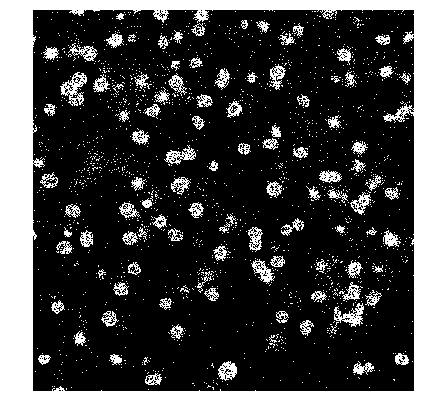

In [99]:
plt.figure(figsize=(7, 7))
plt.imshow(test_image[0, 4, :, :], vmin=90, vmax=91, cmap='gray')
plt.axis('off')